# PI Linear Mastercurve

Fit one PI linear sample; swap files to explore other molecular weights.

**Data:** examples/data/pyRheo/pi_linear/PI_94.9k_T-35.csv


In [1]:
# Google Colab compatibility - uncomment if running in Colab
# !pip install -q rheojax
# from google.colab import drive
# drive.mount('/content/drive')


## Setup and Imports

In [2]:
# Configure matplotlib for inline plotting in VS Code/Jupyter
%matplotlib inline

import warnings
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from rheojax.core.data import RheoData
from rheojax.core.jax_config import safe_import_jax, verify_float64
from rheojax.models.fractional_maxwell_model import FractionalMaxwellModel
from rheojax.models.generalized_maxwell import GeneralizedMaxwell
from rheojax.models.herschel_bulkley import HerschelBulkley
from rheojax.pipeline.base import Pipeline
from rheojax.transforms.mastercurve import Mastercurve

jax, jnp = safe_import_jax()
verify_float64()
np.set_printoptions(precision=4, suppress=True)
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11
warnings.filterwarnings('ignore', category=RuntimeWarning)

def r2_complex(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    ss_res = np.sum(np.abs(y_true - y_pred) ** 2)
    ss_tot = np.sum(np.abs(y_true - np.mean(y_true)) ** 2)
    return float(1 - ss_res / ss_tot)

def mpe(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return float(np.mean(np.abs(y_true - y_pred) / np.maximum(np.abs(y_true), 1e-12)) * 100)
import arviz as az


INFO:2025-12-07 17:23:42,398:jax._src.xla_bridge:808: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: dlopen(libtpu.so, 0x0001): tried: 'libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache), 'libtpu.so' (no such file)


Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: dlopen(libtpu.so, 0x0001): tried: 'libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache), 'libtpu.so' (no such file)


Loading rheojax version 0.4.0


/Users/b80985/Projects/rheojax/.venv/lib/python3.13/site-packages/piblin_jax/__init__.py:28: UserWarning: GPU acceleration is only available on Linux with CUDA 12+. Using JAX in CPU mode.
  from . import backend, data, dataio, transform


Found 'auto' as default backend, checking available backends


Matplotlib is available, defining as default backend


arviz_base available, exposing its functions as part of arviz.preview


arviz_stats available, exposing its functions as part of arviz.preview


arviz_plots available, exposing its functions as part of arviz.preview


## Load PI mastercurve candidate

In [3]:
DATA_DIR = Path.cwd().parent / 'data' / 'pyRheo' / 'pi_linear'
file = DATA_DIR / 'PI_94.9k_T-35.csv'
df = pd.read_csv(file)
omega = df['Angular Frequency'].to_numpy()
Gp = df['Storage Modulus'].to_numpy()
Gpp = df['Loss Modulus'].to_numpy()
G_star = Gp + 1j*Gpp


## Fit models

In [4]:
gm = GeneralizedMaxwell(n_modes=5, modulus_type='tensile')
gm.fit(omega, G_star, test_mode='oscillation', use_log_residuals=True)
gm_pred_components = gm.predict(omega)
gm_pred = gm_pred_components[:,0] + 1j*gm_pred_components[:,1]
gm_r2 = r2_complex(G_star, gm_pred)

fm = FractionalMaxwellModel()
fm.fit(omega, G_star, test_mode='oscillation', use_log_residuals=True)
fm_pred = fm.predict(omega, test_mode='oscillation')
fm_r2 = r2_complex(G_star, fm_pred)

print({'gm_r2': gm_r2, 'fm_r2': fm_r2})


Starting least squares optimization | {'method': 'trf', 'n_params': 11, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 1.192628s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=28 | final_cost=3.468625e+11 | time=1.193s | final_gradient_norm=4.862264852152328e+16


Starting least squares optimization | {'method': 'trf', 'n_params': 11, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.296965s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=28 | final_cost=3.468625e+11 | time=0.297s | final_gradient_norm=4.862264852152328e+16


Starting least squares optimization | {'method': 'trf', 'n_params': 9, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.645261s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=29 | final_cost=4.917669e+11 | time=0.645s | final_gradient_norm=9610047360580700.0


Starting least squares optimization | {'method': 'trf', 'n_params': 7, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.629578s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=44 | final_cost=9.698605e+11 | time=0.630s | final_gradient_norm=9620586927671258.0


Element minimization: early termination at n_modes=3 (R²=0.990708 < threshold=0.995015)


Element minimization: reducing from 5 to 4 modes


Starting least squares optimization | {'method': 'trf', 'n_params': 4, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 1.032591s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=45 | final_cost=1.148651e+01 | time=1.033s | final_gradient_norm=0.0017495487180052914


{'gm_r2': 0.9952869470448827, 'fm_r2': 0.13105523320197354}


## Plot fits

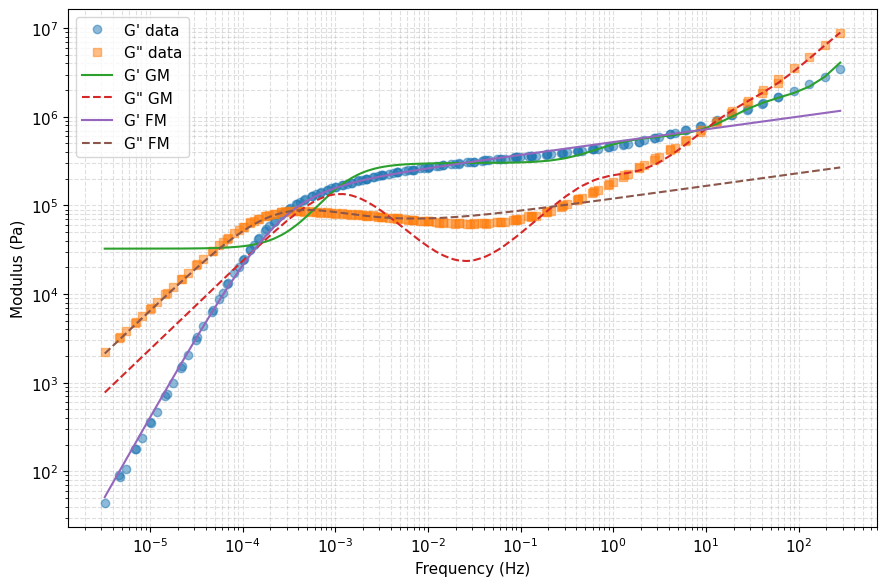

In [5]:
freq_hz = omega/(2*np.pi)
fig, ax = plt.subplots(figsize=(9,6))
ax.loglog(freq_hz, np.real(G_star), 'o', label="G' data", alpha=0.5)
ax.loglog(freq_hz, np.imag(G_star), 's', label='G" data', alpha=0.5)
ax.loglog(freq_hz, np.real(gm_pred), '-', label="G' GM")
ax.loglog(freq_hz, np.imag(gm_pred), '--', label='G" GM')
ax.loglog(freq_hz, np.real(fm_pred), '-', label="G' FM")
ax.loglog(freq_hz, np.imag(fm_pred), '--', label='G" FM')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Modulus (Pa)')
ax.grid(True, which='both', ls='--', alpha=0.4)
ax.legend()
plt.tight_layout()
display(fig)
plt.close(fig)

## Bayesian workflow (NLSQ → best model → NUTS diagnostics)

Starting least squares optimization | {'method': 'trf', 'n_params': 9, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.532197s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=40 | final_cost=4.917670e+11 | time=0.532s | final_gradient_norm=9.934713482549373e+16


Starting least squares optimization | {'method': 'trf', 'n_params': 9, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.311193s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=40 | final_cost=4.917670e+11 | time=0.311s | final_gradient_norm=9.934713482549373e+16


Starting least squares optimization | {'method': 'trf', 'n_params': 7, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.241889s


Convergence: reason=Both `ftol` and `xtol` termination conditions are satisfied. | iterations=44 | final_cost=9.698605e+11 | time=0.242s | final_gradient_norm=9563989905868162.0


Element minimization: early termination at n_modes=3 (R²=0.990708 < threshold=0.992933)


Starting least squares optimization | {'method': 'trf', 'n_params': 4, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.376051s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=45 | final_cost=1.148651e+01 | time=0.376s | final_gradient_norm=0.0017495487180052914


Model ranking (R²): [('gm', 0.995), ('fm', 0.131)]


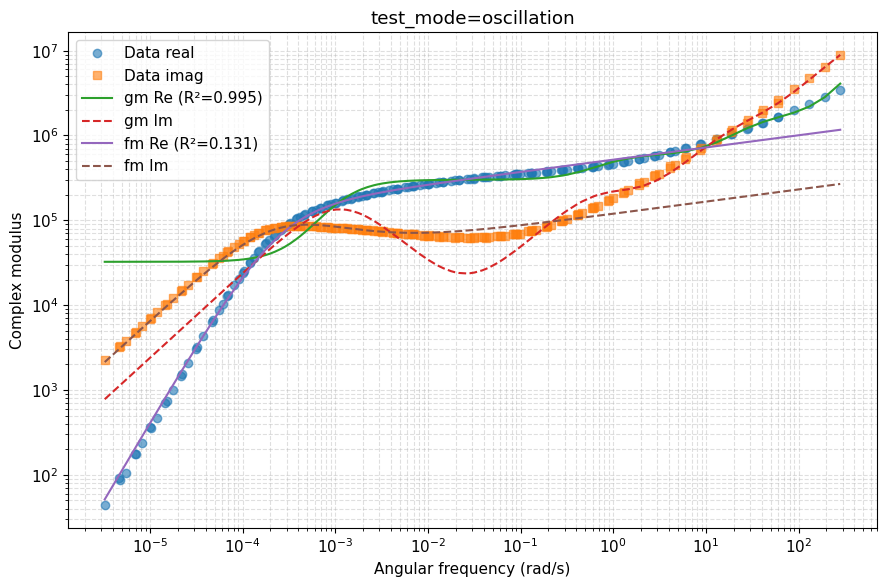

  0%|          | 0/4000 [00:00<?, ?it/s]

warmup:   0%|          | 1/4000 [00:00<58:42,  1.14it/s, 1 steps of size 2.34e+00. acc. prob=0.00]

warmup:   2%|▏         | 86/4000 [00:00<00:32, 119.34it/s, 255 steps of size 1.57e-02. acc. prob=0.76]

warmup:   4%|▍         | 163/4000 [00:01<00:16, 227.18it/s, 15 steps of size 1.99e-02. acc. prob=0.77]

warmup:   6%|▌         | 248/4000 [00:01<00:10, 346.05it/s, 127 steps of size 8.90e-02. acc. prob=0.78]

warmup:   8%|▊         | 320/4000 [00:01<00:08, 424.95it/s, 127 steps of size 6.10e-02. acc. prob=0.78]

warmup:  10%|█         | 416/4000 [00:01<00:06, 550.13it/s, 15 steps of size 1.74e-01. acc. prob=0.78] 

warmup:  12%|█▏        | 496/4000 [00:01<00:05, 604.75it/s, 63 steps of size 5.52e-02. acc. prob=0.78]

warmup:  14%|█▍        | 579/4000 [00:01<00:05, 663.40it/s, 31 steps of size 1.04e-01. acc. prob=0.79]

warmup:  17%|█▋        | 685/4000 [00:01<00:04, 771.02it/s, 31 steps of size 1.43e-01. acc. prob=0.79]

warmup:  20%|█▉        | 794/4000 [00:01<00:03, 859.95it/s, 7 steps of size 1.54e-01. acc. prob=0.79] 

warmup:  22%|██▎       | 900/4000 [00:01<00:03, 914.93it/s, 31 steps of size 1.51e-01. acc. prob=0.79]

warmup:  25%|██▍       | 998/4000 [00:02<00:03, 872.86it/s, 63 steps of size 6.25e-02. acc. prob=0.79]

sample:  27%|██▋       | 1090/4000 [00:02<00:03, 822.36it/s, 63 steps of size 6.39e-02. acc. prob=0.94]

sample:  29%|██▉       | 1176/4000 [00:02<00:03, 797.87it/s, 63 steps of size 6.39e-02. acc. prob=0.94]

sample:  31%|███▏      | 1259/4000 [00:02<00:03, 777.60it/s, 31 steps of size 6.39e-02. acc. prob=0.95]

sample:  33%|███▎      | 1339/4000 [00:02<00:03, 761.71it/s, 63 steps of size 6.39e-02. acc. prob=0.94]

sample:  35%|███▌      | 1417/4000 [00:02<00:03, 748.35it/s, 63 steps of size 6.39e-02. acc. prob=0.95]

sample:  37%|███▋      | 1495/4000 [00:02<00:03, 753.70it/s, 63 steps of size 6.39e-02. acc. prob=0.94]

sample:  39%|███▉      | 1571/4000 [00:02<00:03, 749.70it/s, 127 steps of size 6.39e-02. acc. prob=0.95]

sample:  41%|████      | 1647/4000 [00:02<00:03, 751.07it/s, 63 steps of size 6.39e-02. acc. prob=0.95] 

sample:  43%|████▎     | 1725/4000 [00:02<00:03, 756.83it/s, 95 steps of size 6.39e-02. acc. prob=0.95]

sample:  45%|████▌     | 1801/4000 [00:03<00:02, 743.06it/s, 63 steps of size 6.39e-02. acc. prob=0.95]

sample:  47%|████▋     | 1876/4000 [00:03<00:02, 735.69it/s, 31 steps of size 6.39e-02. acc. prob=0.95]

sample:  49%|████▉     | 1950/4000 [00:03<00:02, 730.70it/s, 63 steps of size 6.39e-02. acc. prob=0.95]

sample:  51%|█████     | 2029/4000 [00:03<00:02, 744.58it/s, 63 steps of size 6.39e-02. acc. prob=0.95]

sample:  53%|█████▎    | 2105/4000 [00:03<00:02, 748.78it/s, 63 steps of size 6.39e-02. acc. prob=0.94]

sample:  55%|█████▍    | 2180/4000 [00:03<00:02, 742.65it/s, 63 steps of size 6.39e-02. acc. prob=0.94]

sample:  56%|█████▋    | 2255/4000 [00:03<00:02, 741.78it/s, 31 steps of size 6.39e-02. acc. prob=0.94]

sample:  58%|█████▊    | 2330/4000 [00:03<00:02, 733.69it/s, 31 steps of size 6.39e-02. acc. prob=0.94]

sample:  60%|██████    | 2404/4000 [00:03<00:02, 728.38it/s, 63 steps of size 6.39e-02. acc. prob=0.94]

sample:  62%|██████▏   | 2477/4000 [00:04<00:02, 722.63it/s, 63 steps of size 6.39e-02. acc. prob=0.94]

sample:  64%|██████▍   | 2550/4000 [00:04<00:02, 724.49it/s, 63 steps of size 6.39e-02. acc. prob=0.94]

sample:  66%|██████▌   | 2624/4000 [00:04<00:01, 728.84it/s, 31 steps of size 6.39e-02. acc. prob=0.94]

sample:  68%|██████▊   | 2702/4000 [00:04<00:01, 743.86it/s, 63 steps of size 6.39e-02. acc. prob=0.94]

sample:  69%|██████▉   | 2777/4000 [00:04<00:01, 735.97it/s, 31 steps of size 6.39e-02. acc. prob=0.94]

sample:  71%|███████▏  | 2851/4000 [00:04<00:01, 724.45it/s, 127 steps of size 6.39e-02. acc. prob=0.94]

sample:  73%|███████▎  | 2924/4000 [00:04<00:01, 710.65it/s, 63 steps of size 6.39e-02. acc. prob=0.94] 

sample:  75%|███████▌  | 3000/4000 [00:04<00:01, 724.52it/s, 63 steps of size 6.39e-02. acc. prob=0.94]

sample:  77%|███████▋  | 3074/4000 [00:04<00:01, 728.05it/s, 191 steps of size 6.39e-02. acc. prob=0.94]

sample:  79%|███████▉  | 3152/4000 [00:04<00:01, 741.98it/s, 63 steps of size 6.39e-02. acc. prob=0.94] 

sample:  81%|████████  | 3227/4000 [00:05<00:01, 744.32it/s, 63 steps of size 6.39e-02. acc. prob=0.94]

sample:  83%|████████▎ | 3302/4000 [00:05<00:00, 738.77it/s, 31 steps of size 6.39e-02. acc. prob=0.94]

sample:  84%|████████▍ | 3379/4000 [00:05<00:00, 745.45it/s, 63 steps of size 6.39e-02. acc. prob=0.94]

sample:  86%|████████▋ | 3457/4000 [00:05<00:00, 755.12it/s, 31 steps of size 6.39e-02. acc. prob=0.94]

sample:  88%|████████▊ | 3533/4000 [00:05<00:00, 752.13it/s, 127 steps of size 6.39e-02. acc. prob=0.94]

sample:  90%|█████████ | 3609/4000 [00:05<00:00, 747.90it/s, 63 steps of size 6.39e-02. acc. prob=0.94] 

sample:  92%|█████████▏| 3684/4000 [00:05<00:00, 737.84it/s, 15 steps of size 6.39e-02. acc. prob=0.94]

sample:  94%|█████████▍| 3758/4000 [00:05<00:00, 738.46it/s, 63 steps of size 6.39e-02. acc. prob=0.94]

sample:  96%|█████████▌| 3832/4000 [00:05<00:00, 737.76it/s, 63 steps of size 6.39e-02. acc. prob=0.94]

sample:  98%|█████████▊| 3907/4000 [00:05<00:00, 738.90it/s, 127 steps of size 6.39e-02. acc. prob=0.94]

sample: 100%|█████████▉| 3981/4000 [00:06<00:00, 728.01it/s, 63 steps of size 6.39e-02. acc. prob=0.94] 

sample: 100%|██████████| 4000/4000 [00:06<00:00, 655.97it/s, 63 steps of size 6.39e-02. acc. prob=0.94]

  0%|          | 0/4000 [00:00<?, ?it/s]

warmup:   2%|▏         | 71/4000 [00:00<00:05, 687.77it/s, 255 steps of size 1.81e-02. acc. prob=0.76]

warmup:   4%|▎         | 145/4000 [00:00<00:05, 712.68it/s, 191 steps of size 5.14e-02. acc. prob=0.77]

warmup:   6%|▌         | 237/4000 [00:00<00:04, 803.45it/s, 31 steps of size 2.80e-01. acc. prob=0.78] 

warmup:   8%|▊         | 318/4000 [00:00<00:04, 771.05it/s, 47 steps of size 1.29e-01. acc. prob=0.78]

warmup:  10%|█         | 406/4000 [00:00<00:04, 806.26it/s, 63 steps of size 6.30e-02. acc. prob=0.78]

warmup:  12%|█▏        | 487/4000 [00:00<00:04, 756.93it/s, 127 steps of size 7.31e-02. acc. prob=0.78]

warmup:  14%|█▍        | 564/4000 [00:00<00:04, 751.06it/s, 31 steps of size 5.03e-02. acc. prob=0.79] 

warmup:  16%|█▌        | 649/4000 [00:00<00:04, 778.81it/s, 63 steps of size 1.21e-01. acc. prob=0.79]

warmup:  18%|█▊        | 737/4000 [00:00<00:04, 808.62it/s, 31 steps of size 1.65e-01. acc. prob=0.79]

warmup:  21%|██        | 828/4000 [00:01<00:03, 835.89it/s, 127 steps of size 1.08e-01. acc. prob=0.79]

warmup:  23%|██▎       | 924/4000 [00:01<00:03, 870.27it/s, 63 steps of size 6.08e-02. acc. prob=0.79] 

sample:  25%|██▌       | 1012/4000 [00:01<00:03, 841.33it/s, 63 steps of size 8.73e-02. acc. prob=0.88]

sample:  27%|██▋       | 1097/4000 [00:01<00:03, 838.03it/s, 63 steps of size 8.73e-02. acc. prob=0.90]

sample:  30%|██▉       | 1182/4000 [00:01<00:03, 834.50it/s, 31 steps of size 8.73e-02. acc. prob=0.90]

sample:  32%|███▏      | 1267/4000 [00:01<00:03, 837.62it/s, 31 steps of size 8.73e-02. acc. prob=0.90]

sample:  34%|███▍      | 1351/4000 [00:01<00:03, 834.02it/s, 31 steps of size 8.73e-02. acc. prob=0.90]

sample:  36%|███▌      | 1443/4000 [00:01<00:02, 857.92it/s, 63 steps of size 8.73e-02. acc. prob=0.90]

sample:  38%|███▊      | 1532/4000 [00:01<00:02, 866.58it/s, 63 steps of size 8.73e-02. acc. prob=0.90]

sample:  40%|████      | 1619/4000 [00:01<00:02, 852.44it/s, 31 steps of size 8.73e-02. acc. prob=0.90]

sample:  43%|████▎     | 1705/4000 [00:02<00:02, 824.26it/s, 63 steps of size 8.73e-02. acc. prob=0.90]

sample:  45%|████▍     | 1798/4000 [00:02<00:02, 851.95it/s, 63 steps of size 8.73e-02. acc. prob=0.90]

sample:  47%|████▋     | 1884/4000 [00:02<00:02, 826.20it/s, 31 steps of size 8.73e-02. acc. prob=0.90]

sample:  49%|████▉     | 1971/4000 [00:02<00:02, 838.10it/s, 63 steps of size 8.73e-02. acc. prob=0.90]

sample:  52%|█████▏    | 2060/4000 [00:02<00:02, 852.69it/s, 31 steps of size 8.73e-02. acc. prob=0.90]

sample:  54%|█████▎    | 2148/4000 [00:02<00:02, 857.68it/s, 63 steps of size 8.73e-02. acc. prob=0.90]

sample:  56%|█████▌    | 2241/4000 [00:02<00:02, 877.99it/s, 63 steps of size 8.73e-02. acc. prob=0.90]

sample:  58%|█████▊    | 2330/4000 [00:02<00:01, 881.30it/s, 31 steps of size 8.73e-02. acc. prob=0.90]

sample:  61%|██████    | 2423/4000 [00:02<00:01, 895.52it/s, 31 steps of size 8.73e-02. acc. prob=0.90]

sample:  63%|██████▎   | 2513/4000 [00:03<00:01, 890.63it/s, 63 steps of size 8.73e-02. acc. prob=0.90]

sample:  65%|██████▌   | 2603/4000 [00:03<00:01, 893.18it/s, 63 steps of size 8.73e-02. acc. prob=0.90]

sample:  67%|██████▋   | 2693/4000 [00:03<00:01, 885.54it/s, 31 steps of size 8.73e-02. acc. prob=0.90]

sample:  70%|██████▉   | 2785/4000 [00:03<00:01, 894.16it/s, 31 steps of size 8.73e-02. acc. prob=0.90]

sample:  72%|███████▏  | 2875/4000 [00:03<00:01, 866.04it/s, 63 steps of size 8.73e-02. acc. prob=0.90]

sample:  74%|███████▍  | 2962/4000 [00:03<00:01, 849.38it/s, 31 steps of size 8.73e-02. acc. prob=0.90]

sample:  76%|███████▌  | 3049/4000 [00:03<00:01, 852.85it/s, 63 steps of size 8.73e-02. acc. prob=0.90]

sample:  78%|███████▊  | 3136/4000 [00:03<00:01, 856.89it/s, 63 steps of size 8.73e-02. acc. prob=0.90]

sample:  81%|████████  | 3228/4000 [00:03<00:00, 875.32it/s, 31 steps of size 8.73e-02. acc. prob=0.90]

sample:  83%|████████▎ | 3316/4000 [00:03<00:00, 860.02it/s, 31 steps of size 8.73e-02. acc. prob=0.90]

sample:  85%|████████▌ | 3406/4000 [00:04<00:00, 870.06it/s, 31 steps of size 8.73e-02. acc. prob=0.90]

sample:  87%|████████▋ | 3494/4000 [00:04<00:00, 857.24it/s, 31 steps of size 8.73e-02. acc. prob=0.90]

sample:  90%|████████▉ | 3580/4000 [00:04<00:00, 837.80it/s, 63 steps of size 8.73e-02. acc. prob=0.90]

sample:  92%|█████████▏| 3668/4000 [00:04<00:00, 847.94it/s, 63 steps of size 8.73e-02. acc. prob=0.90]

sample:  94%|█████████▍| 3753/4000 [00:04<00:00, 847.24it/s, 63 steps of size 8.73e-02. acc. prob=0.90]

sample:  96%|█████████▌| 3838/4000 [00:04<00:00, 846.43it/s, 31 steps of size 8.73e-02. acc. prob=0.90]

sample:  98%|█████████▊| 3929/4000 [00:04<00:00, 863.10it/s, 31 steps of size 8.73e-02. acc. prob=0.90]

sample: 100%|██████████| 4000/4000 [00:04<00:00, 845.28it/s, 63 steps of size 8.73e-02. acc. prob=0.90]

  0%|          | 0/4000 [00:00<?, ?it/s]

warmup:   1%|▏         | 58/4000 [00:00<00:06, 576.92it/s, 255 steps of size 1.56e-02. acc. prob=0.75]

warmup:   3%|▎         | 117/4000 [00:00<00:06, 584.52it/s, 255 steps of size 4.78e-02. acc. prob=0.77]

warmup:   4%|▍         | 176/4000 [00:00<00:06, 579.23it/s, 23 steps of size 3.61e-02. acc. prob=0.77] 

warmup:   6%|▋         | 255/4000 [00:00<00:05, 649.11it/s, 383 steps of size 3.51e-02. acc. prob=0.78]

warmup:   8%|▊         | 326/4000 [00:00<00:05, 665.69it/s, 255 steps of size 5.38e-02. acc. prob=0.78]

warmup:  10%|█         | 416/4000 [00:00<00:04, 740.70it/s, 63 steps of size 1.76e-01. acc. prob=0.79] 

warmup:  13%|█▎        | 503/4000 [00:00<00:04, 781.82it/s, 31 steps of size 5.39e-02. acc. prob=0.78]

warmup:  15%|█▌        | 602/4000 [00:00<00:04, 847.03it/s, 31 steps of size 1.19e-01. acc. prob=0.79]

warmup:  18%|█▊        | 701/4000 [00:00<00:03, 890.08it/s, 47 steps of size 8.96e-02. acc. prob=0.79]

warmup:  20%|██        | 806/4000 [00:01<00:03, 937.77it/s, 31 steps of size 1.80e-01. acc. prob=0.79]

warmup:  23%|██▎       | 905/4000 [00:01<00:03, 953.11it/s, 31 steps of size 1.07e-01. acc. prob=0.79]

sample:  25%|██▌       | 1001/4000 [00:01<00:03, 908.67it/s, 63 steps of size 7.39e-02. acc. prob=0.99]

sample:  27%|██▋       | 1093/4000 [00:01<00:03, 869.13it/s, 63 steps of size 7.39e-02. acc. prob=0.95]

sample:  30%|██▉       | 1181/4000 [00:01<00:03, 820.83it/s, 63 steps of size 7.39e-02. acc. prob=0.94]

sample:  32%|███▏      | 1268/4000 [00:01<00:03, 834.09it/s, 63 steps of size 7.39e-02. acc. prob=0.94]

sample:  34%|███▍      | 1353/4000 [00:01<00:03, 824.86it/s, 63 steps of size 7.39e-02. acc. prob=0.94]

sample:  36%|███▌      | 1436/4000 [00:01<00:03, 806.11it/s, 63 steps of size 7.39e-02. acc. prob=0.94]

sample:  38%|███▊      | 1517/4000 [00:01<00:03, 798.36it/s, 15 steps of size 7.39e-02. acc. prob=0.94]

sample:  40%|███▉      | 1598/4000 [00:01<00:03, 797.01it/s, 63 steps of size 7.39e-02. acc. prob=0.94]

sample:  42%|████▏     | 1678/4000 [00:02<00:02, 776.41it/s, 95 steps of size 7.39e-02. acc. prob=0.94]

sample:  44%|████▍     | 1760/4000 [00:02<00:02, 788.18it/s, 63 steps of size 7.39e-02. acc. prob=0.94]

sample:  46%|████▌     | 1841/4000 [00:02<00:02, 793.25it/s, 31 steps of size 7.39e-02. acc. prob=0.94]

sample:  48%|████▊     | 1921/4000 [00:02<00:02, 783.15it/s, 31 steps of size 7.39e-02. acc. prob=0.94]

sample:  50%|█████     | 2003/4000 [00:02<00:02, 790.77it/s, 63 steps of size 7.39e-02. acc. prob=0.94]

sample:  52%|█████▏    | 2087/4000 [00:02<00:02, 799.59it/s, 127 steps of size 7.39e-02. acc. prob=0.94]

sample:  54%|█████▍    | 2168/4000 [00:02<00:02, 798.68it/s, 31 steps of size 7.39e-02. acc. prob=0.94] 

sample:  56%|█████▌    | 2248/4000 [00:02<00:02, 778.97it/s, 63 steps of size 7.39e-02. acc. prob=0.94]

sample:  58%|█████▊    | 2329/4000 [00:02<00:02, 785.82it/s, 63 steps of size 7.39e-02. acc. prob=0.94]

sample:  60%|██████    | 2412/4000 [00:03<00:01, 797.11it/s, 63 steps of size 7.39e-02. acc. prob=0.94]

sample:  62%|██████▏   | 2492/4000 [00:03<00:01, 788.75it/s, 63 steps of size 7.39e-02. acc. prob=0.94]

sample:  64%|██████▍   | 2574/4000 [00:03<00:01, 794.76it/s, 63 steps of size 7.39e-02. acc. prob=0.94]

sample:  66%|██████▋   | 2654/4000 [00:03<00:01, 790.42it/s, 31 steps of size 7.39e-02. acc. prob=0.94]

sample:  68%|██████▊   | 2734/4000 [00:03<00:01, 789.67it/s, 31 steps of size 7.39e-02. acc. prob=0.94]

sample:  70%|███████   | 2818/4000 [00:03<00:01, 804.13it/s, 63 steps of size 7.39e-02. acc. prob=0.94]

sample:  72%|███████▏  | 2899/4000 [00:03<00:01, 798.93it/s, 15 steps of size 7.39e-02. acc. prob=0.94]

sample:  75%|███████▍  | 2983/4000 [00:03<00:01, 809.53it/s, 31 steps of size 7.39e-02. acc. prob=0.94]

sample:  77%|███████▋  | 3064/4000 [00:03<00:01, 781.31it/s, 95 steps of size 7.39e-02. acc. prob=0.94]

sample:  79%|███████▉  | 3153/4000 [00:03<00:01, 812.35it/s, 31 steps of size 7.39e-02. acc. prob=0.94]

sample:  81%|████████  | 3235/4000 [00:04<00:00, 801.32it/s, 31 steps of size 7.39e-02. acc. prob=0.94]

sample:  83%|████████▎ | 3316/4000 [00:04<00:00, 781.36it/s, 63 steps of size 7.39e-02. acc. prob=0.94]

sample:  85%|████████▍ | 3395/4000 [00:04<00:00, 774.69it/s, 31 steps of size 7.39e-02. acc. prob=0.94]

sample:  87%|████████▋ | 3476/4000 [00:04<00:00, 781.59it/s, 127 steps of size 7.39e-02. acc. prob=0.94]

sample:  89%|████████▉ | 3555/4000 [00:04<00:00, 780.30it/s, 63 steps of size 7.39e-02. acc. prob=0.94] 

sample:  91%|█████████ | 3634/4000 [00:04<00:00, 782.42it/s, 63 steps of size 7.39e-02. acc. prob=0.94]

sample:  93%|█████████▎| 3713/4000 [00:04<00:00, 782.81it/s, 63 steps of size 7.39e-02. acc. prob=0.94]

sample:  95%|█████████▍| 3796/4000 [00:04<00:00, 796.42it/s, 63 steps of size 7.39e-02. acc. prob=0.94]

sample:  97%|█████████▋| 3876/4000 [00:04<00:00, 784.12it/s, 31 steps of size 7.39e-02. acc. prob=0.94]

sample:  99%|█████████▉| 3955/4000 [00:04<00:00, 782.49it/s, 63 steps of size 7.39e-02. acc. prob=0.94]

sample: 100%|██████████| 4000/4000 [00:05<00:00, 793.97it/s, 47 steps of size 7.39e-02. acc. prob=0.94]

  0%|          | 0/4000 [00:00<?, ?it/s]

warmup:   2%|▏         | 79/4000 [00:00<00:04, 785.60it/s, 55 steps of size 1.28e-02. acc. prob=0.76]

warmup:   4%|▍         | 161/4000 [00:00<00:04, 797.75it/s, 127 steps of size 4.67e-02. acc. prob=0.77]

warmup:   6%|▌         | 241/4000 [00:00<00:05, 713.48it/s, 63 steps of size 1.14e-01. acc. prob=0.78] 

warmup:   8%|▊         | 314/4000 [00:00<00:05, 670.78it/s, 31 steps of size 1.39e-01. acc. prob=0.78]

warmup:  10%|▉         | 395/4000 [00:00<00:05, 715.37it/s, 31 steps of size 1.31e-01. acc. prob=0.78]

warmup:  12%|█▏        | 478/4000 [00:00<00:04, 750.55it/s, 127 steps of size 6.97e-02. acc. prob=0.78]

warmup:  14%|█▍        | 555/4000 [00:00<00:04, 755.32it/s, 127 steps of size 6.08e-02. acc. prob=0.79]

warmup:  16%|█▋        | 653/4000 [00:00<00:04, 823.56it/s, 63 steps of size 8.10e-02. acc. prob=0.79] 

warmup:  19%|█▉        | 753/4000 [00:00<00:03, 877.41it/s, 63 steps of size 1.29e-01. acc. prob=0.79]

warmup:  21%|██▏       | 853/4000 [00:01<00:03, 911.56it/s, 47 steps of size 1.04e-01. acc. prob=0.79]

warmup:  24%|██▎       | 947/4000 [00:01<00:03, 919.64it/s, 63 steps of size 1.16e-01. acc. prob=0.79]

sample:  26%|██▌       | 1040/4000 [00:01<00:03, 807.01it/s, 63 steps of size 6.32e-02. acc. prob=0.92]

sample:  28%|██▊       | 1124/4000 [00:01<00:03, 788.74it/s, 15 steps of size 6.32e-02. acc. prob=0.93]

sample:  30%|███       | 1205/4000 [00:01<00:03, 789.80it/s, 31 steps of size 6.32e-02. acc. prob=0.93]

sample:  32%|███▏      | 1286/4000 [00:01<00:03, 771.99it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  34%|███▍      | 1365/4000 [00:01<00:03, 748.28it/s, 63 steps of size 6.32e-02. acc. prob=0.94]

sample:  36%|███▌      | 1441/4000 [00:01<00:03, 750.77it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  38%|███▊      | 1520/4000 [00:01<00:03, 761.57it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  40%|███▉      | 1597/4000 [00:02<00:03, 742.88it/s, 63 steps of size 6.32e-02. acc. prob=0.94]

sample:  42%|████▏     | 1676/4000 [00:02<00:03, 754.94it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  44%|████▍     | 1755/4000 [00:02<00:02, 764.91it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  46%|████▌     | 1832/4000 [00:02<00:02, 759.34it/s, 31 steps of size 6.32e-02. acc. prob=0.93]

sample:  48%|████▊     | 1915/4000 [00:02<00:02, 778.74it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  50%|████▉     | 1994/4000 [00:02<00:02, 739.14it/s, 31 steps of size 6.32e-02. acc. prob=0.93]

sample:  52%|█████▏    | 2069/4000 [00:02<00:02, 741.00it/s, 31 steps of size 6.32e-02. acc. prob=0.93]

sample:  54%|█████▎    | 2144/4000 [00:02<00:02, 710.57it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  55%|█████▌    | 2217/4000 [00:02<00:02, 715.12it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  57%|█████▋    | 2294/4000 [00:02<00:02, 729.51it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  59%|█████▉    | 2374/4000 [00:03<00:02, 749.93it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  61%|██████▏   | 2450/4000 [00:03<00:02, 740.13it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  63%|██████▎   | 2525/4000 [00:03<00:02, 736.62it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  65%|██████▍   | 2599/4000 [00:03<00:01, 725.62it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  67%|██████▋   | 2672/4000 [00:03<00:02, 580.29it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  68%|██████▊   | 2735/4000 [00:03<00:02, 542.41it/s, 31 steps of size 6.32e-02. acc. prob=0.93]

sample:  70%|███████   | 2811/4000 [00:03<00:01, 595.68it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  72%|███████▏  | 2884/4000 [00:03<00:01, 627.90it/s, 127 steps of size 6.32e-02. acc. prob=0.93]

sample:  74%|███████▍  | 2953/4000 [00:04<00:01, 641.17it/s, 95 steps of size 6.32e-02. acc. prob=0.93] 

sample:  76%|███████▌  | 3030/4000 [00:04<00:01, 675.58it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  78%|███████▊  | 3102/4000 [00:04<00:01, 688.15it/s, 47 steps of size 6.32e-02. acc. prob=0.93]

sample:  79%|███████▉  | 3179/4000 [00:04<00:01, 711.55it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  81%|████████▏ | 3254/4000 [00:04<00:01, 722.63it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  83%|████████▎ | 3328/4000 [00:04<00:00, 722.38it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  85%|████████▌ | 3401/4000 [00:04<00:00, 717.37it/s, 127 steps of size 6.32e-02. acc. prob=0.93]

sample:  87%|████████▋ | 3475/4000 [00:04<00:00, 722.96it/s, 63 steps of size 6.32e-02. acc. prob=0.93] 

sample:  89%|████████▉ | 3550/4000 [00:04<00:00, 730.84it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  91%|█████████ | 3624/4000 [00:04<00:00, 726.03it/s, 31 steps of size 6.32e-02. acc. prob=0.93]

sample:  92%|█████████▏| 3697/4000 [00:05<00:00, 721.24it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  94%|█████████▍| 3770/4000 [00:05<00:00, 723.49it/s, 31 steps of size 6.32e-02. acc. prob=0.93]

sample:  96%|█████████▌| 3846/4000 [00:05<00:00, 733.76it/s, 31 steps of size 6.32e-02. acc. prob=0.93]

sample:  98%|█████████▊| 3922/4000 [00:05<00:00, 738.65it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample: 100%|█████████▉| 3997/4000 [00:05<00:00, 738.98it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample: 100%|██████████| 4000/4000 [00:05<00:00, 733.21it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

/Users/b80985/Projects/rheojax/.venv/lib/python3.13/site-packages/arviz/plots/backends/matplotlib/pairplot.py:223: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of resulting pair plots with these variables, generating only a 8x8 grid
  warnings.warn(


array([[<Axes: ylabel='E_2'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='E_3'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='E_4'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='E_inf'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='sigma_imag'>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='sigma_real'>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='tau_1'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: xlabel='E_1', ylabel='tau_2'>, <Axes: xlabel='E_2'>,
        <Axes: xlabel='E_3'>, <Axes: xlabel='E_4'>,
        <Axes: xlabel='E_inf'>, <Axes: xlabel='sigma_imag'>,
        <Axes: xlabel='sigma_real'>, <

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

Skipping energy plot due to: 'Dataset' object has no attribute 'energy'


/Users/b80985/Projects/rheojax/.venv/lib/python3.13/site-packages/arviz/plots/plot_utils.py:270: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (44) in plot_autocorr, generating only 40 plots
  warnings.warn(


array([[<Axes: title={'center': 'E_1\n0'}>,
        <Axes: title={'center': 'E_1\n1'}>,
        <Axes: title={'center': 'E_1\n2'}>,
        <Axes: title={'center': 'E_1\n3'}>],
       [<Axes: title={'center': 'E_2\n0'}>,
        <Axes: title={'center': 'E_2\n1'}>,
        <Axes: title={'center': 'E_2\n2'}>,
        <Axes: title={'center': 'E_2\n3'}>],
       [<Axes: title={'center': 'E_3\n0'}>,
        <Axes: title={'center': 'E_3\n1'}>,
        <Axes: title={'center': 'E_3\n2'}>,
        <Axes: title={'center': 'E_3\n3'}>],
       [<Axes: title={'center': 'E_4\n0'}>,
        <Axes: title={'center': 'E_4\n1'}>,
        <Axes: title={'center': 'E_4\n2'}>,
        <Axes: title={'center': 'E_4\n3'}>],
       [<Axes: title={'center': 'E_inf\n0'}>,
        <Axes: title={'center': 'E_inf\n1'}>,
        <Axes: title={'center': 'E_inf\n2'}>,
        <Axes: title={'center': 'E_inf\n3'}>],
       [<Axes: title={'center': 'sigma_imag\n0'}>,
        <Axes: title={'center': 'sigma_imag\n1'}>,
     

array([[<Axes: title={'center': 'E_1'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'E_2'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'E_3'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<Axes: title={'center': 'E_4'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'E_inf'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'sigma_imag'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<Axes: title={'center': 'sigma_real'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'tau_1'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'tau_2'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<Axes: title={'center': 'tau_3'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'tau_4'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: >]], dtype=object)

array([[<Axes: title={'center': 'E_1'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'E_2'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'E_3'}, xlabel='Total number of draws', ylabel='ESS'>],
       [<Axes: title={'center': 'E_4'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'E_inf'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'sigma_imag'}, xlabel='Total number of draws', ylabel='ESS'>],
       [<Axes: title={'center': 'sigma_real'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'tau_1'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'tau_2'}, xlabel='Total number of draws', ylabel='ESS'>],
       [<Axes: title={'center': 'tau_3'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'tau_4'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: >

In [6]:
# Unified workflow: load → NLSQ fits → best by R² → Bayesian → diagnostics

# Fallback R² for complex data
if 'r2_complex' not in globals():
    def r2_complex(y_true, y_pred):
        y_true = np.asarray(y_true)
        y_pred = np.asarray(y_pred)
        ss_res = np.sum(np.abs(y_true - y_pred) ** 2)
        ss_tot = np.sum(np.abs(y_true - np.mean(y_true)) ** 2)
        return 1 - ss_res / ss_tot



# Handle models that return real/imag columns instead of complex numbers
if '_coerce_pred' not in globals():
    def _coerce_pred(pred):
        arr = np.asarray(pred)
        if arr.ndim == 2 and arr.shape[1] == 2 and not np.iscomplexobj(arr):
            arr = arr[:, 0] + 1j * arr[:, 1]
        return arr


NUTS_CONFIG = dict(num_chains=4, num_warmup=1000, num_samples=3000)

def _detect_datasets():
    datasets = []
    if 'G_star' in globals() and 'omega' in globals():
        datasets.append({
            'X': omega,
            'y': G_star,
            'test_mode': 'oscillation',
            'x_label': 'Angular frequency (rad/s)',
            'y_label': 'Complex modulus',
        })
    elif 'Gp' in globals() and 'Gpp' in globals() and 'omega' in globals():
        datasets.append({
            'X': omega,
            'y': Gp + 1j * Gpp,
            'test_mode': 'oscillation',
            'x_label': 'Angular frequency (rad/s)',
            'y_label': 'Complex modulus',
        })
    if 'master' in globals() and hasattr(master, 'x') and hasattr(master, 'y'):
        datasets.append({
            'X': master.x,
            'y': master.y,
            'test_mode': master.metadata.get('test_mode', 'oscillation') if hasattr(master, 'metadata') else 'oscillation',
            'x_label': 'Shifted frequency',
            'y_label': 'Mastercurve modulus',
        })
    if 't' in globals() and 'G' in globals():
        datasets.append({
            'X': t,
            'y': G,
            'test_mode': 'relaxation',
            'x_label': 'Time (s)',
            'y_label': 'Relaxation modulus',
        })

    if 't' in globals() and 'E_t' in globals():
        datasets.append({
            'X': t,
            'y': E_t,
            'test_mode': 'relaxation',
            'x_label': 'Time (s)',
            'y_label': 'Relaxation modulus',
        })
    if 't' in globals() and 'sigma' in globals():
        datasets.append({
            'X': t,
            'y': sigma,
            'test_mode': 'relaxation',
            'x_label': 'Time (s)',
            'y_label': 'Stress (Pa)',
        })
    if 't' in globals() and 'J' in globals():
        datasets.append({
            'X': t,
            'y': J,
            'test_mode': 'creep',
            'x_label': 'Time (s)',
            'y_label': 'Creep compliance',
        })
    if 'all_df' in globals() and hasattr(all_df, 'columns') and 'phi' in all_df.columns:
        for phi, frame in all_df.groupby('phi'):
            x_vals = frame.iloc[:, 0].to_numpy()
            y_vals = frame.iloc[:, 1].to_numpy()
            datasets.append({
                'X': x_vals,
                'y': y_vals,
                'test_mode': 'rotation',
                'x_label': f'Shear rate 1/s (phi={phi})',
                'y_label': 'Stress (Pa)',
                'label': f'phi={phi}',
            })
    if not datasets:
        raise ValueError('No datasets detected; ensure data variables are defined before running this cell.')
    return datasets


def _collect_candidate_models():
    if 'candidates' in globals() and isinstance(candidates, (list, tuple)) and candidates:
        return candidates
    models = []
    for name, obj in globals().items():
        if isinstance(obj, type):
            continue  # skip classes; require initialized models
        if hasattr(obj, 'fit_bayesian') and hasattr(obj, 'predict'):
            models.append((name, obj))
    if not models:
        raise ValueError('No candidate models found; define models before running this cell.')
    return models


def _plot_data_and_fits(ds, fits):
    fig, ax = plt.subplots(figsize=(9, 6))
    X_plot = ds['X']
    y_true = ds['y']
    if np.iscomplexobj(y_true):
        x_axis = X_plot / (2 * np.pi) if ds['test_mode'] == 'oscillation' else X_plot
        ax.loglog(x_axis, np.real(y_true), 'o', label="Data real", alpha=0.6)
        ax.loglog(x_axis, np.imag(y_true), 's', label="Data imag", alpha=0.6)
        for rec in fits:
            pred = _coerce_pred(rec['pred'])
            ax.loglog(x_axis, np.real(pred), '-', label=f"{rec['name']} Re (R²={rec['r2']:.3f})")
            ax.loglog(x_axis, np.imag(pred), '--', label=f"{rec['name']} Im")
    else:
        x_axis = X_plot
        ax.loglog(x_axis, y_true, 'o', label='Data', alpha=0.6)
        for rec in fits:
            ax.loglog(x_axis, rec['pred'], '-', label=f"{rec['name']} (R²={rec['r2']:.3f})")
    ax.set_xlabel(ds.get('x_label', 'X'))
    ax.set_ylabel(ds.get('y_label', 'Response'))
    ax.set_title(ds.get('label', f"test_mode={ds['test_mode']}"))
    ax.grid(True, which='both', ls='--', alpha=0.4)
    ax.legend()
    plt.tight_layout()
    display(fig)
    plt.close(fig)


def _plot_diagnostics(idata):
    diag_plotters = [
        ('pair', lambda: az.plot_pair(idata, divergences=True, kind='kde')),
        ('forest', lambda: az.plot_forest(idata, combined=True)),
        ('energy', lambda: az.plot_energy(idata)),
        ('autocorr', lambda: az.plot_autocorr(idata)),
        ('rank', lambda: az.plot_rank(idata)),
        ('ess', lambda: az.plot_ess(idata, kind='evolution')),
    ]
    for name, plot_fn in diag_plotters:
        try:
            obj = plot_fn()
        except Exception as exc:
            print(f"Skipping {name} plot due to: {exc}")
            continue
        plt.tight_layout()
        display(obj)
        plt.close('all')


datasets = _detect_datasets()
model_entries = _collect_candidate_models()

for ds in datasets:
    fits = []
    for name, model in model_entries:
        fitted_model = model
        fit_kwargs = {'test_mode': ds['test_mode'], 'use_log_residuals': True}
        try:
            fitted_model.fit(ds['X'], ds['y'], **fit_kwargs)
        except TypeError:
            fit_kwargs.pop('use_log_residuals', None)
            fitted_model.fit(ds['X'], ds['y'], **fit_kwargs)
        except Exception as exc:
            print(f"Skipping {name} due to fit error: {exc}")
            continue
        predict_kwargs = {'test_mode': ds['test_mode']} if 'test_mode' in fit_kwargs else {}
        try:
            pred = _coerce_pred(fitted_model.predict(ds['X'], **predict_kwargs))
        except Exception as exc:
            print(f"Skipping {name} due to predict error: {exc}")
            continue
        try:
            r2_val = r2_complex(ds['y'], pred) if np.iscomplexobj(ds['y']) else fitted_model.score(ds['X'], ds['y'])
        except Exception as exc:
            print(f"Skipping {name} due to scoring error: {exc}")
            continue
        fits.append({'name': name, 'model': fitted_model, 'pred': pred, 'r2': float(r2_val)})

    if not fits:
        print('No successful fits for dataset; skipping Bayesian step.')
        continue

    fits.sort(key=lambda rec: rec['r2'], reverse=True)
    best = fits[0]
    print(f"Model ranking (R²): {[ (rec['name'], round(rec['r2'], 3)) for rec in fits ]}")
    _plot_data_and_fits(ds, fits)

    try:
        bayes_result = best['model'].fit_bayesian(
            ds['X'],
            ds['y'],
            **NUTS_CONFIG,
            test_mode=ds['test_mode'],
        )
        idata = bayes_result.to_inference_data()
        _plot_diagnostics(idata)
    except Exception as exc:
        print(f"Skipping Bayesian step for {best['name']} due to: {exc}")
